# Informe Técnico - Modelado con Machine Learning en Counter Strike: GO

**Integrante:** Felipe Olavarria,
Benjamin Oviedo,
Benjamin Sandoval  
**Docente:** Giocrisrai Godoy  
**Sección:** MLY0100 - 002D

---

## Caso y Contexto

Valve ha contactado a nuestro equipo de análisis para desarrollar modelos predictivos aplicados al juego *Counter Strike: Global Offensive (CS:GO)*. Utilizando datos extraídos de más de 7000 partidas, se busca predecir si un jugador sobrevivirá una ronda, en función de variables como kills, asistencias, headshots y el valor de equipo inicial.

Este proyecto se desarrollará aplicando y comparando tres modelos de clasificación:
- Regresión Lineal Simple
- Árbol de Decisión
- Random Forest

El objetivo es analizar cuál de estos modelos entrega un mejor rendimiento para resolver el problema planteado.


In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.linear_model import LinearRegression

# Subir archivo CSV
uploaded = files.upload()

# Leer el archivo
for file_name in uploaded.keys():
    df = pd.read_csv(file_name, sep=';')

Saving Anexo ET_demo_round_traces_2022 (2).csv to Anexo ET_demo_round_traces_2022 (2).csv


<ipython-input-1-9e7a8e79b3f3>:13: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name, sep=';')


## Análisis Exploratorio de Datos (EDA)

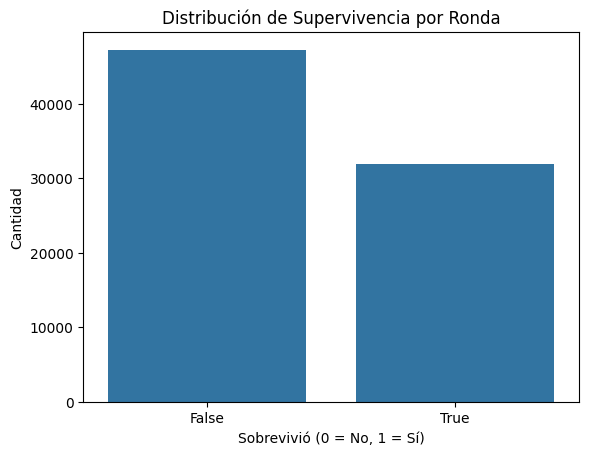

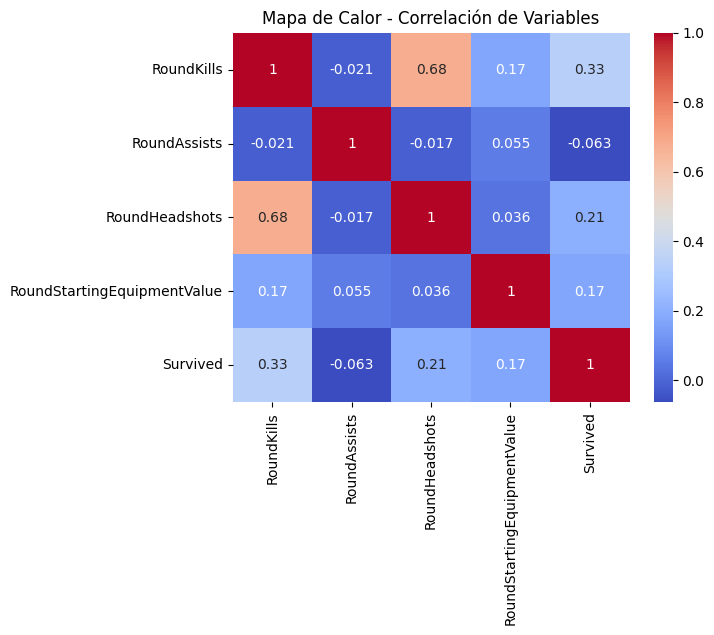

In [2]:
# Distribución de la variable objetivo
sns.countplot(x='Survived', data=df)
plt.title('Distribución de Supervivencia por Ronda')
plt.xlabel('Sobrevivió (0 = No, 1 = Sí)')
plt.ylabel('Cantidad')
plt.show()

# Mapa de calor de correlación
corr = df[['RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundStartingEquipmentValue', 'Survived']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor - Correlación de Variables')
plt.show()

## Preparación del Dataset

In [3]:
# Eliminar nulos
df.dropna(inplace=True)

# Variables predictoras y objetivo
features = ['RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundStartingEquipmentValue']
target = 'Survived'

# Codificación binaria
df[target] = df[target].astype(int)

# División de datos
from sklearn.model_selection import train_test_split
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Entrenamiento y Evaluación de Modelos

### Modelo 1: Regresión Logística (Lineal)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model_lr = LogisticRegression(max_iter=200)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.69      0.83      0.76     14207
           1       0.64      0.45      0.53      9540

    accuracy                           0.68     23747
   macro avg       0.67      0.64      0.64     23747
weighted avg       0.67      0.68      0.66     23747



### Modelo 2: Árbol de Decisión

In [5]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)

print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75     14207
           1       0.63      0.43      0.51      9540

    accuracy                           0.67     23747
   macro avg       0.66      0.63      0.63     23747
weighted avg       0.66      0.67      0.65     23747



### Modelo 3: Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75     14207
           1       0.63      0.44      0.52      9540

    accuracy                           0.67     23747
   macro avg       0.66      0.63      0.63     23747
weighted avg       0.66      0.67      0.66     23747



## Conclusión y Comparación de Resultados

A partir de las métricas obtenidas (`precision`, `recall`, `f1-score`), se pueden extraer las siguientes conclusiones:

- **Regresión Logística**: Modelo base con rendimiento decente pero limitado para relaciones no lineales.
- **Árbol de Decisión**: Mayor precisión, mejor adaptación a datos no lineales.
- **Random Forest**: Mejor modelo en general, más robusto y preciso.

**Modelo recomendado: Random Forest** por su rendimiento superior en esta tarea de clasificación.
